In [1]:
import torch.nn as nn
from torchvision import datasets, transforms, models
import torch 
import os
from pokemon_classifier import get_info, Pokemon_classifier_trainer
import json

In [2]:
torch.cuda.memory_summary(device='cuda', abbreviated=False)
print(torch.version.cuda)

12.4


In [3]:
directory = "PokemonData"
checkpoint_path = 'checkpoint.pth'


In [4]:
dataset = datasets.ImageFolder(directory)

class_names=dataset.classes
print(class_names)
print(len(class_names))
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [5]:
train_transform =  transforms.Compose([
    transforms.RandomRotation(20),     
    transforms.RandomHorizontalFlip(),  
    transforms.Resize((360,360)),             
    transforms.RandomAffine(degrees=0, shear=20, scale=(0.8,1.2)),  
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])


In [6]:
Pokemon_classifier_trainer(directory, checkpoint_path, train_transform)

c:\Users\kawam\anaconda3\envs\pokemon_classifier\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kawam\anaconda3\envs\pokemon_classifier\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading checkpoint from checkpoint.pth...
Checkpoint loaded: start from epoch 3


c:\Users\kawam\projekt_ai\pokemon classifier\pokemon_classifier.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)
Epoch 3/100:   0%|        

Training interrupted, saving checkpoint...
Checkpoint saved at epoch 3
Checkpoint saved. You can resume training later.
Finished Training


'Training Complete'

In [7]:
model = models.efficientnet_b0(pretrained=True)

num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 150)

model = model.to('cuda')

model.load_state_dict(torch.load('model.pth'))
model.eval()
model.to('cuda')

Name:  charmander
Base Experience:  62
Height:  0.6 m
Weight:  8.5 kg
Abilities: blaze, solar-power


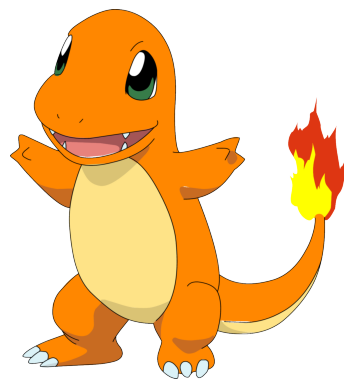

Name:  gengar
Base Experience:  250
Height:  1.5 m
Weight:  40.5 kg
Abilities: cursed-body


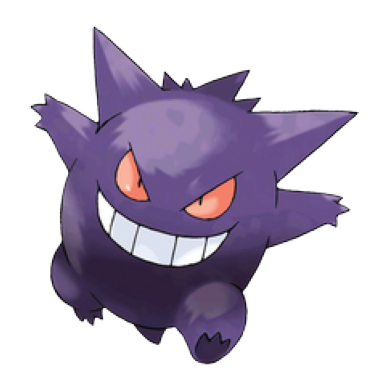

Name:  squirtle
Base Experience:  63
Height:  0.5 m
Weight:  9.0 kg
Abilities: torrent, rain-dish


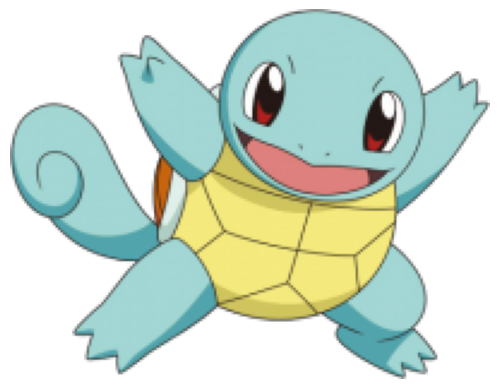

Name:  haunter
Base Experience:  142
Height:  1.6 m
Weight:  0.1 kg
Abilities: levitate


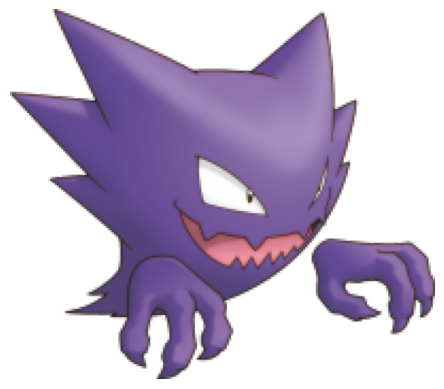

Name:  psyduck
Base Experience:  64
Height:  0.8 m
Weight:  19.6 kg
Abilities: damp, cloud-nine, swift-swim


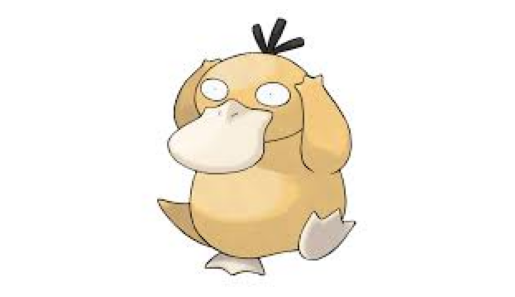

Name:  mew
Base Experience:  300
Height:  0.4 m
Weight:  4.0 kg
Abilities: synchronize


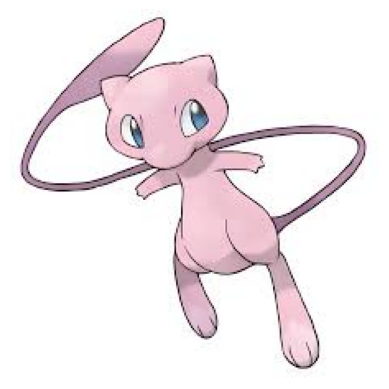

Name:  alakazam
Base Experience:  250
Height:  1.5 m
Weight:  48.0 kg
Abilities: synchronize, inner-focus, magic-guard


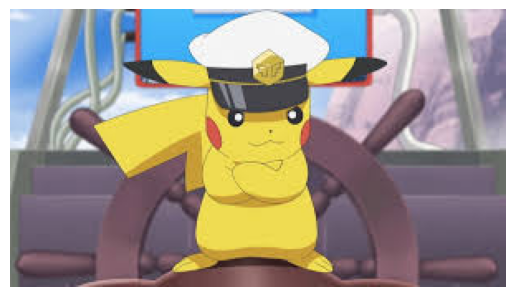

Name:  pikachu
Base Experience:  112
Height:  0.4 m
Weight:  6.0 kg
Abilities: static, lightning-rod


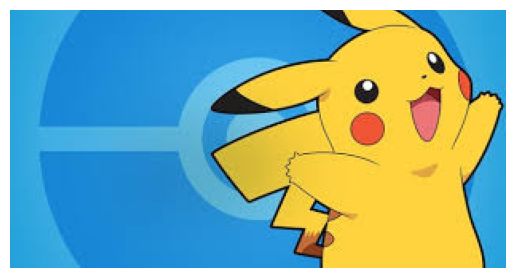

Name:  pikachu
Base Experience:  112
Height:  0.4 m
Weight:  6.0 kg
Abilities: static, lightning-rod


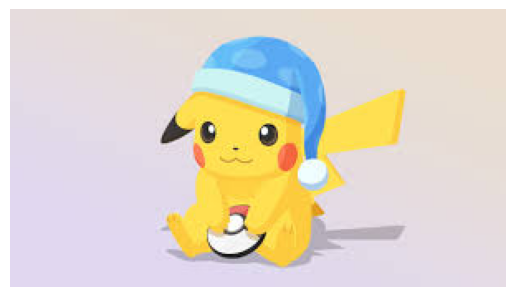

Name:  snorlax
Base Experience:  189
Height:  2.1 m
Weight:  460.0 kg
Abilities: immunity, thick-fat, gluttony


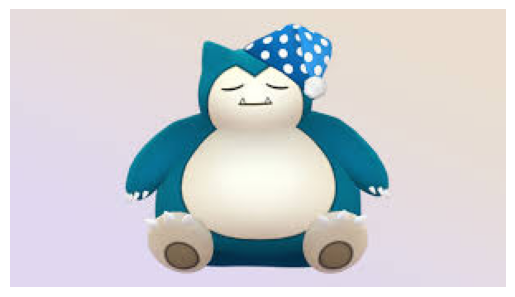

Name:  pikachu
Base Experience:  112
Height:  0.4 m
Weight:  6.0 kg
Abilities: static, lightning-rod


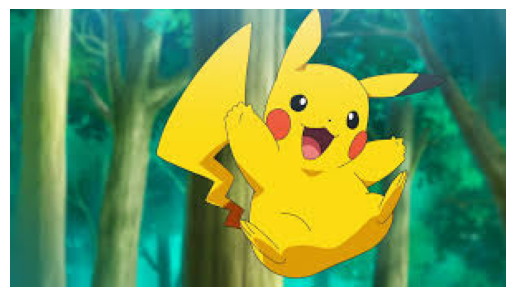

Name:  vaporeon
Base Experience:  184
Height:  1.0 m
Weight:  29.0 kg
Abilities: water-absorb, hydration


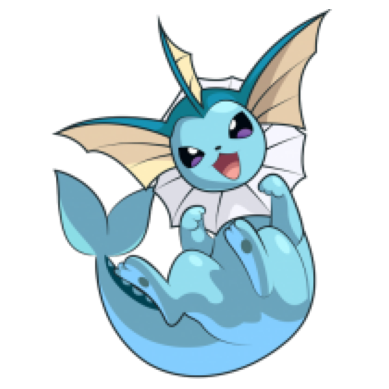

Name:  sandshrew
Base Experience:  60
Height:  0.6 m
Weight:  12.0 kg
Abilities: sand-veil, sand-rush


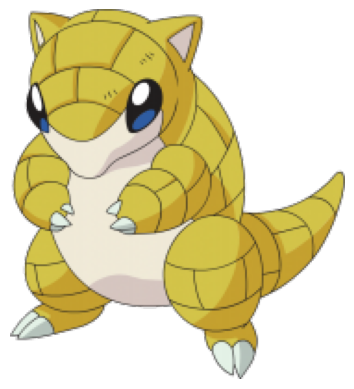

Name:  charizard
Base Experience:  267
Height:  1.7 m
Weight:  90.5 kg
Abilities: blaze, solar-power


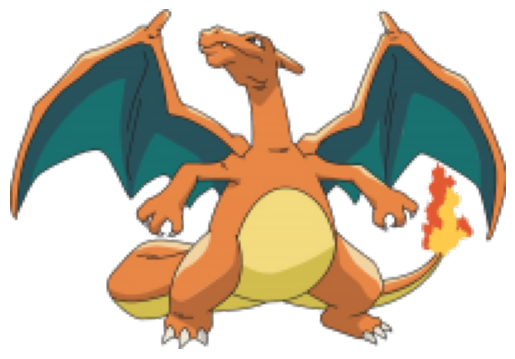

Name:  caterpie
Base Experience:  39
Height:  0.3 m
Weight:  2.9 kg
Abilities: shield-dust, run-away


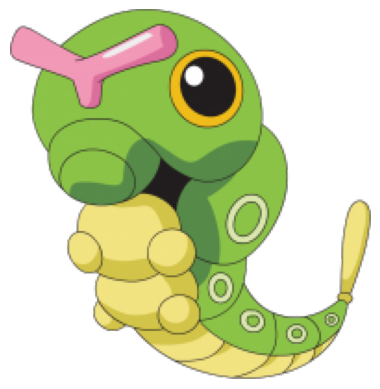

Name:  bulbasaur
Base Experience:  64
Height:  0.7 m
Weight:  6.9 kg
Abilities: overgrow, chlorophyll


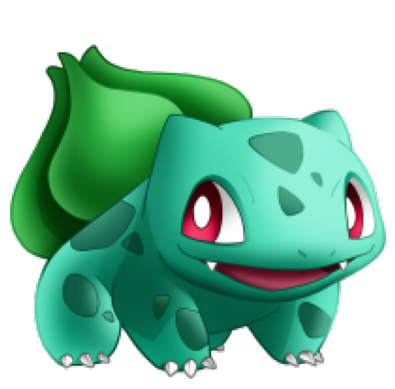

Name:  eevee
Base Experience:  65
Height:  0.3 m
Weight:  6.5 kg
Abilities: run-away, adaptability, anticipation


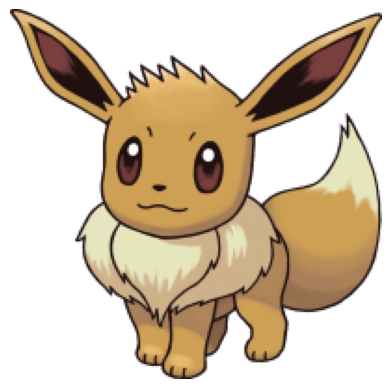

Name:  charizard
Base Experience:  267
Height:  1.7 m
Weight:  90.5 kg
Abilities: blaze, solar-power


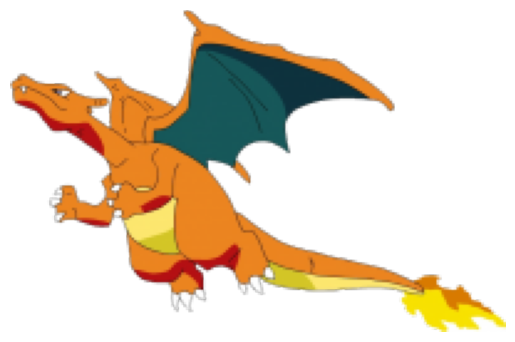

Name:  zapdos
Base Experience:  290
Height:  1.6 m
Weight:  52.6 kg
Abilities: pressure, static


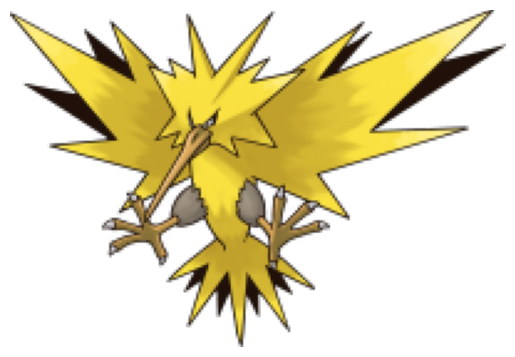

Name:  articuno
Base Experience:  290
Height:  1.7 m
Weight:  55.4 kg
Abilities: pressure, snow-cloak


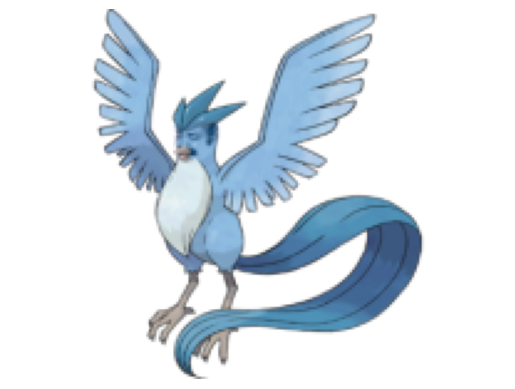

Name:  blastoise
Base Experience:  265
Height:  1.6 m
Weight:  85.5 kg
Abilities: torrent, rain-dish


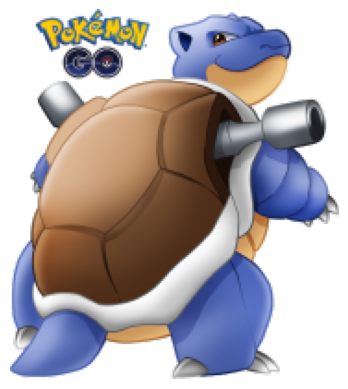

Name:  bulbasaur
Base Experience:  64
Height:  0.7 m
Weight:  6.9 kg
Abilities: overgrow, chlorophyll


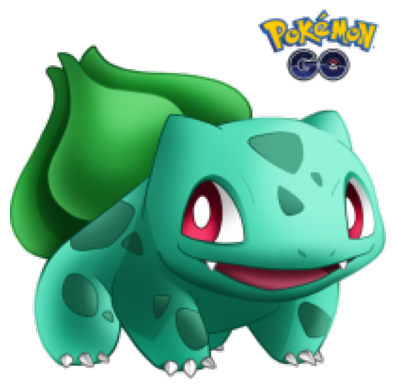

In [9]:
folder_path = r"C:\Users\kawam\Desktop\pokedle"

for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)  
    get_info(image_path, model, train_transform, class_names) 